In [16]:
# 01_EDA.ipynb — Streamio Retention Project
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Try to load from local path first
local_path = r"C:\Users\acer\Downloads\archive (10)\WA_Fn-UseC_-Telco-Customer-Churn.csv"
github_path = "../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv"

# If local file exists, use it; else fall back to repo path
if os.path.exists(local_path):
    df = pd.read_csv(local_path)
    print("Loaded dataset from local system ✅")
else:
    df = pd.read_csv(github_path)
    print("Loaded dataset from GitHub repo path ✅")
print("Shape:", df.shape)
df.head()

Loaded dataset from local system ✅
Shape: (7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
# Quick info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [19]:
# Convert TotalCharges to numeric and handle missing values
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"].fillna(df["MonthlyCharges"] * df["tenure"], inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_23872\346924424.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["TotalCharges"].fillna(df["MonthlyCharges"] * df["tenure"], inplace=True)


In [20]:
# Drop duplicates, reset index
df.drop_duplicates(inplace=True)
df.reset_index(drop=True, inplace=True)

In [21]:
# Convert churn column to numeric
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

In [22]:

# Basic statistics
display(df.describe())

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [23]:
# Churn rate
churn_rate = df["Churn"].mean() * 100
print(f"Overall churn rate: {churn_rate:.2f}%")

Overall churn rate: 26.54%


C:\Users\acer\AppData\Local\Temp\ipykernel_23872\4099327239.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Churn", data=df, palette="coolwarm")


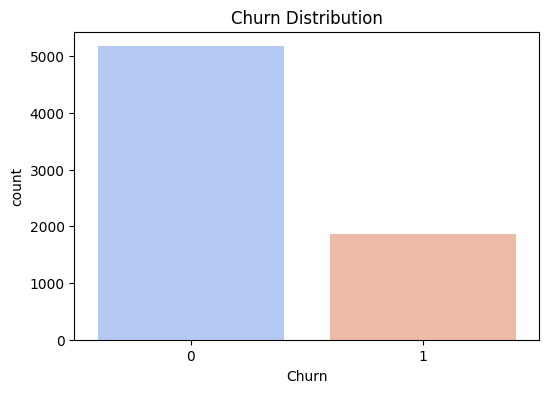

In [24]:
# Plot churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="coolwarm")
plt.title("Churn Distribution")
plt.show()

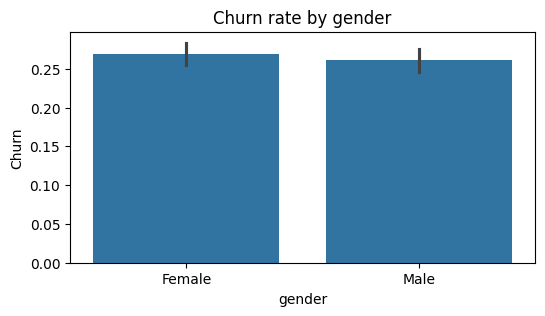

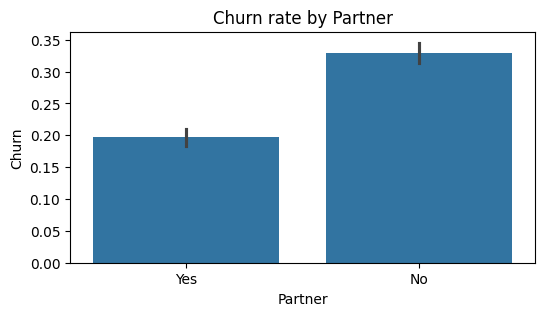

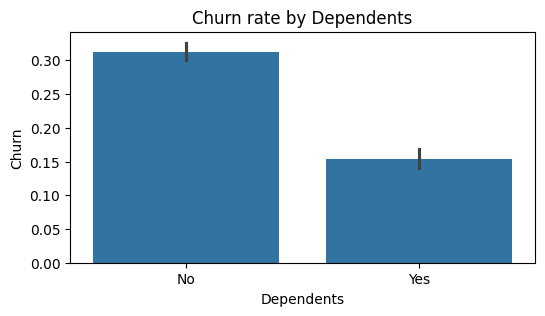

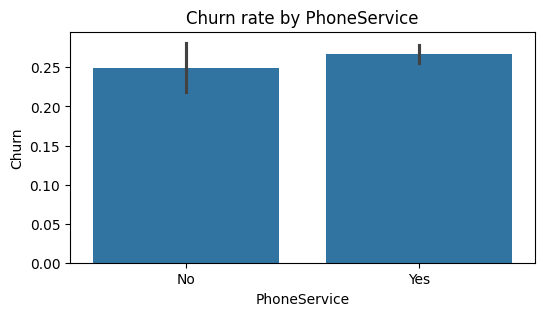

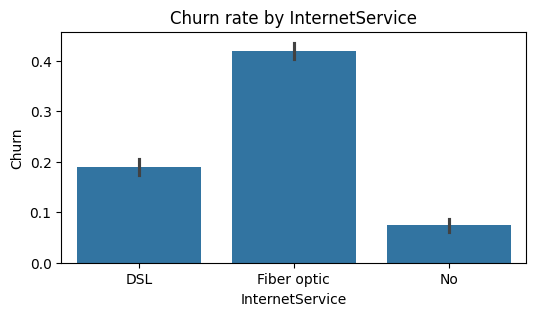

In [25]:
# Categorical columns
categorical_cols = ['gender','Partner','Dependents','PhoneService','InternetService']
for col in categorical_cols:
    plt.figure(figsize=(6,3))
    sns.barplot(x=col, y='Churn', data=df)
    plt.title(f"Churn rate by {col}")
    plt.show()